In [8]:
import pandas as pd

cycle = pd.read_csv('10.csv',parse_dates = [0,1], infer_datetime_format=True)

In [9]:
cycle

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-10-01 01:50:02.035000+00:00,2020-10-01 02:19:36.385000+00:00,1774,1050,EICC,Outside Edinburgh International Conference Centre,55.946071,-3.210396,1102,Haymarket Station,Haymarket Station,55.945569,-3.218185
1,2020-10-01 02:07:21.040000+00:00,2020-10-01 02:53:34.548000+00:00,2773,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750
2,2020-10-01 02:08:37.692000+00:00,2020-10-01 03:05:53.355000+00:00,3435,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750
3,2020-10-01 04:25:54.283000+00:00,2020-10-01 04:45:12.275000+00:00,1157,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589
4,2020-10-01 04:35:56.950000+00:00,2020-10-01 04:51:02.609000+00:00,905,1102,Haymarket Station,Haymarket Station,55.945569,-3.218185,262,Canonmills,near Tesco's,55.962804,-3.196284
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19374,2020-10-30 23:27:35.329000+00:00,2020-10-30 23:38:40.363000+00:00,665,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033,1051,Warrender Park Road,On corner with Spottiswoode Street,55.938369,-3.198033
19375,2020-10-30 23:33:50.315000+00:00,2020-10-30 23:40:02.898000+00:00,372,1798,Chambers Street,Outside National Museum,55.947600,-3.188920,1814,Abbeyhill,Near Abbey Mount,55.955248,-3.172216
19376,2020-10-30 23:38:57.695000+00:00,2020-10-30 23:43:33.379000+00:00,275,1028,Hunter Square,In Hunter Square next to Tron Kirk,55.949798,-3.187795,1019,Grassmarket,West end of Grassmarket,55.947097,-3.197246
19377,2020-10-30 23:41:26.671000+00:00,2020-10-30 23:50:44.489000+00:00,557,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,259,St Andrew Square,North East corner,55.954906,-3.192444


In [10]:
# all functions defined to answer the questions in this task are collected inside the Class of functions Question2. Because
# this class expects only 1 input of a dataframe, the class will need to be called each time a dataframe is to be analysed.

class Question2:
    
    def __init__(self, df):
        '''The initialisation function expects one arguments to initialise which dataframe the functions are being applied to
        
        df: DataFrame to be analysed'''
        self.df = df
        
    def trips_week(self):
        '''This will return the number of trips that occurred on every day of the week'''
        
        self.df['dow'] = self.df['started_at'].dt.dayofweek.values
        trips_dow = self.df.groupby('dow').count()['started_at']
        days = trips_dow.index
        return (days, trips_dow)

    def trips_hour(self):
        '''This will return the number of trips that occurred on every hour of the day'''

        self.df['hr'] = self.df['started_at'].dt.hour.values
        trips_hr = self.df.groupby('hr').count()['started_at']
        hrs = trips_hr.index
        return (hrs, trips_hr)

    def spatial_coords(self, idx):
        '''This will return the start and end coordinates for the idx'th trip of the Dataframe.

        idx: index/trip on dataframe to extract locations from'''

        x1 = self.df['start_station_latitude'][idx]
        x2 = self.df['end_station_latitude'][idx]
        y1 = self.df['start_station_longitude'][idx]
        y2 = self.df['end_station_latitude'][idx]
        return (x1, y1), (x2, y2)

    def distance(self, P1, P2):
        '''This will return the distance between two 2D points.

        P1, P2: 2-tuple floats representing coordinates of stations'''

        return np.linalg.norm(P1-P2)

    def hav_distance(self, P1,P2):
        '''computes the Haversine distance which determines the great circle distance between two coordinates of longitude
        and latitude. 

        P1, P2: 2-tuple floats representing coordinates of stations'''
        
        # Convert coordinates to radians
        lat1,long1 = np.radians(P1[0]),np.radians(P1[1])
        lat2,long2 = np.radians(P2[0]),np.radians(P2[1])
        
        # radius of Earth in Km 
        r = 6371 
        
        # use formula for Haversine distance from Wikipedia 
        hav = np.sin((lat2-lat1)/2)**2 +np.cos(lat1)*np.cos(lat2)*np.sin((long2-long1)/2)**2
        dist = 2*r*np.arcsin(np.sqrt(hav))
        
        return dist


    def trips_startend_station(self, station):
        '''This will return the trips that started at 'station' and the trips that ended at 'station'

        station: Station name'''

        start = self.df.loc[self.df['start_station_name'].str.startswith(station)]
        end = self.df.loc[self.df['end_station_name'].str.startswith(station)]
        
        return start, end

    def count_starts(self, coord):
        '''This will return the number of round trips that occured at the station coordinates coord. A round trip is defined
        as a trip where the start and end station are the same.

        coord: 2-tuple of latitude and longitude of station'''

        num = len(self.df.loc[(round(self.df['start_station_latitude'],3) == coord[0]) &\
                              (round(self.df['start_station_longitude'],3) == coord[1])])
        return num

    
    def get_arrows(self, locations, color, size=10, n_arrows=3):
        '''
        NOTE: This function was taken directly from a Medium blog post found at: 
            https://medium.com/@bobhaffner/folium-lines-with-arrows-25a0fe88e4e
        And as such, we take no credit for this work and thank Bob Haffner for providing the code.
        
        
        Get a list of correctly placed and rotated arrows/markers to be plotted

        locations : list of lists of lat lons that represent the 
                    start and end of the line. 
                    eg [[41.1132, -96.1993],[41.3810, -95.8021]]
                    
        arrow_color : default is 'blue'
        
        size : default is 10
        
        n_arrows : number of arrows to create.  default is 3
        
        Return
        list of arrows/markers
        
        Notes
        Based on https://gist.github.com/jeromer/2005586
        '''

        # Point named tuple
        Point = namedtuple('Point', field_names=['lat', 'lon'])

        # creating point from our Point named tuple
        p1 = Point(locations[0][0], locations[0][1])
        p2 = Point(locations[1][0], locations[1][1])        

        # Convert coordinates to radians and determine difference in longitudes to determine compass bearing below
        long_diff = np.radians(p2.lon - p1.lon)
        lat1 = np.radians(p1.lat)
        lat2 = np.radians(p2.lat)

        #Compute the compass bearings between points p1 and p2
        x = np.sin(long_diff) * np.cos(lat2)
        y = (np.cos(lat1) * np.sin(lat2) 
            - (np.sin(lat1) * np.cos(lat2) 
            * np.cos(long_diff)))
        bearing = np.degrees(np.arctan2(x, y))

        # adjusting for compass bearing
        if bearing < 0:
            bearing + 360

        # getting the rotation needed for our marker. We subtract 90 to account for the marker's orientation
        # of due East
        rotation = bearing - 90

        # get an evenly space list of lats and lons for our arrows. Note that I'm discarding the first and last for aesthetics
        # as I'm using markers to denote the start and end
        arrow_lats = np.linspace(p1.lat, p2.lat, n_arrows + 2)[1:n_arrows+1]
        arrow_lons = np.linspace(p1.lon, p2.lon, n_arrows + 2)[1:n_arrows+1]

        # Initialise the arrows marker coordinates list
        arrows = []

        #creating each "arrow" and appending them to our arrows list
        for points in zip(arrow_lats, arrow_lons):
            arrows.append(folium.RegularPolygonMarker(location=points, 
                          fill_color=color, number_of_sides=3, 
                          radius=size, rotation=rotation))
        return arrows

In [11]:
cycle.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-10-01 01:50:02.035000+00:00,2020-10-01 02:19:36.385000+00:00,1774,1050,EICC,Outside Edinburgh International Conference Centre,55.946071,-3.210396,1102,Haymarket Station,Haymarket Station,55.945569,-3.218185
1,2020-10-01 02:07:21.040000+00:00,2020-10-01 02:53:34.548000+00:00,2773,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750
2,2020-10-01 02:08:37.692000+00:00,2020-10-01 03:05:53.355000+00:00,3435,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750
3,2020-10-01 04:25:54.283000+00:00,2020-10-01 04:45:12.275000+00:00,1157,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589
4,2020-10-01 04:35:56.950000+00:00,2020-10-01 04:51:02.609000+00:00,905,1102,Haymarket Station,Haymarket Station,55.945569,-3.218185,262,Canonmills,near Tesco's,55.962804,-3.196284


In [12]:
cycle.describe()

,duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude
count,19379.000000,19379.000000,19379.000000,19379.000000,19379.000000,19379.000000,19379.000000
mean,1603.368027,1094.217452,55.948969,-3.197209,1146.937045,55.950579,-3.196366
std,1880.724598,680.041959,0.013300,0.040372,682.874213,0.014164,0.043018
min,61.000000,171.000000,55.908413,-3.407156,171.000000,55.908413,-3.407156
25%,545.000000,265.000000,55.940071,-3.208070,265.000000,55.940081,-3.209248
50%,970.000000,1090.000000,55.946643,-3.192444,1096.000000,55.948949,-3.191890
75%,2045.500000,1753.000000,55.957872,-3.180986,1758.000000,55.959954,-3.176686
max,24993.000000,2268.000000,55.992957,-3.058307,2268.000000,55.992957,-3.058307


In [13]:
cycle = cycle.drop(['start_station_description', 'end_station_description', 'start_station_id', 'end_station_id' ], axis=1)
cycle.head()

,started_at,ended_at,duration,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude
0,2020-10-01 01:50:02.035000+00:00,2020-10-01 02:19:36.385000+00:00,1774,EICC,55.946071,-3.210396,Haymarket Station,55.945569,-3.218185
1,2020-10-01 02:07:21.040000+00:00,2020-10-01 02:53:34.548000+00:00,2773,Morningside Road,55.927985,-3.209750,Morningside Road,55.927985,-3.209750
2,2020-10-01 02:08:37.692000+00:00,2020-10-01 03:05:53.355000+00:00,3435,Morningside Road,55.927985,-3.209750,Morningside Road,55.927985,-3.209750
3,2020-10-01 04:25:54.283000+00:00,2020-10-01 04:45:12.275000+00:00,1157,St Andrews House,55.953164,-3.181682,Dundee Terrace,55.939710,-3.220589
4,2020-10-01 04:35:56.950000+00:00,2020-10-01 04:51:02.609000+00:00,905,Haymarket Station,55.945569,-3.218185,Canonmills,55.962804,-3.196284


In [14]:
#Instantiate the class to use the cycle dataframe
ALLDATA_Q2functions = Question2(cycle)

# Return the number of trips that happened on each day of the week
weekly_trips = ALLDATA_Q2functions.trips_week()

# Return the number of trips that happened on each hour of the data
hourly_trips = ALLDATA_Q2functions.trips_hour()

C:\Users\s1522100\AppData\Local\Continuum\anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


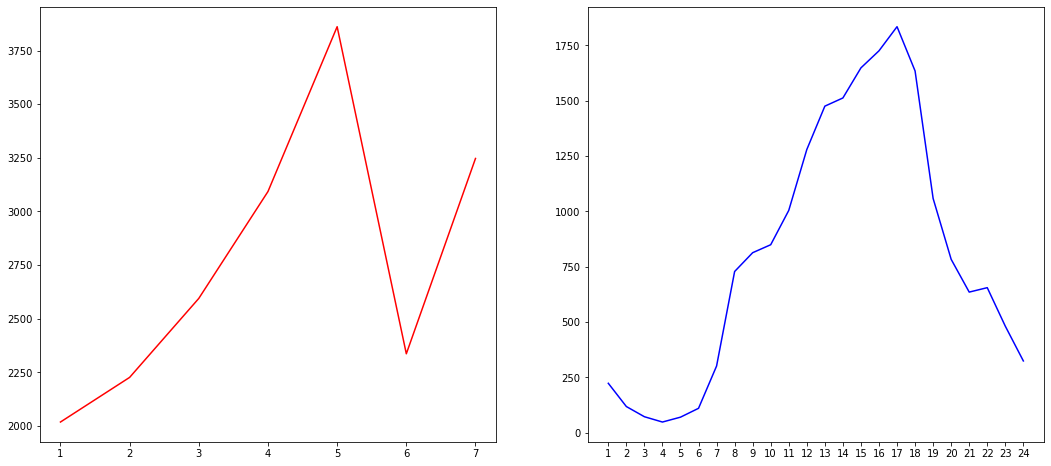

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(121)
ax1.plot(weekly_trips[0]+1, weekly_trips[1], 'r')
ax1.set_xticks(np.arange(1,8))
ax2 = fig.add_subplot(122)
ax2.plot(hourly_trips[0]+1, hourly_trips[1],'b')
ax2.set_xticks(np.arange(1,25))
fig.show()

In [16]:
import numpy as np

# This returns a unique list of all stations in the dataframe. There are 77 recorded start stations and 77 recorded end stations.
station_names = list(cycle['start_station_name'].unique())

# This will store all the latitude and longitude locations of each station.
marker_locations = []
for station in station_names:
    # Returns the trips that *started* at 'station', hence the indexing [0].
    station_frame = ALLDATA_Q2functions.trips_startend_station(station)[0]
    
    # Some locations for stations are only slightly different to eachother, so for all trips starting at 'station', we
    # take the mean value of the coordinates to make sure we have a unique and singular set of coordinates for each station.
    marker_locations.append((np.mean(list(set(station_frame['start_station_latitude']))),
                             np.mean(list(set(station_frame['start_station_longitude'])))))

In [41]:
marker_locations

[(55.94607055533778, -3.2103963310007657),
 (55.92798534979654, -3.209749771944871),
 (55.95316433242384, -3.1816823409318435),
 (55.94556945067266, -3.2181846832795604),
 (55.95524788917224, -3.1722162800950704),
 (55.95108946523637, -3.17572460948655),
 (55.940237631689435, -3.194640214184801),
 (55.92781815597736, -3.2133077222032247),
 (55.94007146917616, -3.2153358406880836),
 (55.949797565633276, -3.1877950320129003),
 (55.9603797205459, -3.1954703369027584),
 (55.9664789377601, -3.175136355924792),
 (55.97132539148154, -3.2079635674242586),
 (55.96901164826488, -3.16739470303429),
 (55.946063966641006, -3.2230240243595745),
 (55.967918070442884, -3.1735862970647304),
 (55.9371232399911, -3.206431879393449),
 (55.93970989541296, -3.2205889336679547),
 (55.944248052468346, -3.2031045991104747),
 (55.946642799617116, -3.1854745859388918),
 (55.939809466328285, -3.182738850746431),
 (55.95198075619354, -3.191890332557904),
 (55.9387414422504, -3.2299092549009023),
 (55.9641178798895

In [32]:
# add day of week and distance for each journey
cycle['dow'] = cycle['started_at'].dt.dayofweek.values
cycle['distance'] = ALLDATA_Q2functions.hav_distance((cycle['start_station_latitude'],cycle['start_station_longitude']),\
                                 (cycle['end_station_latitude'],cycle['end_station_longitude']))

# split cycle into weekdays and weekend 
cycle_weekdays = cycle.copy()
cycle_weekdays = cycle_weekdays.loc[(cycle_weekdays.dow != 5) & (cycle_weekdays.dow != 6)]
cycle_weekend = cycle.copy()
cycle_weekend = cycle_weekend.loc[(cycle_weekend.dow == 5) | (cycle_weekend.dow == 6)]

# Instantiate the class to use dataframes cycle_weekend and cycle_weekdays
weekenddata_funcs = Question2(cycle_weekend)
weekdaydata_funcs = Question2(cycle_weekdays)

In [ ]:
# cycle is the pandas dataframe
cycle['dow'] = cycle['started_at'].dt.dayofweek.values
cycle_weekdays = cycle.copy()
cycle_weekdays = cycle_weekdays.loc[(cycle_weekdays.dow != 5) & (cycle_weekdays.dow != 6)]
cycle_weekend = cycle.copy()
cycle_weekend = cycle_weekend.loc[(cycle_weekend.dow == 5) | (cycle_weekend.dow == 6)]

# average journey time:
print('The average journey time on weekdays is: {} minutes.'.format(round(cycle_weekdays.duration.mean()/60)))
print('The average journey time on weekends is: {} minutes.\n'.format(round(cycle_weekend.duration.mean()/60)))
# average journey distance
print('The average journey distance on weekdays is: {} km.'.format(round(cycle_weekdays.distance.mean(),2)))
print('The average journey distance on weekends is: {} km.'.format(round(cycle_weekend.distance.mean(),2)))

In [33]:
# average journey time:
print('The average journey time on weekdays is: {} minutes.'.format(round(cycle_weekdays.duration.mean()/60)))
print('The average journey time on weekends is: {} minutes.\n'.format(round(cycle_weekend.duration.mean()/60)))
# average journey distance
print('The average journey distance on weekdays is: {} km.'.format(round(cycle_weekdays.distance.mean(),2)))
print('The average journey distance on weekends is: {} km.'.format(round(cycle_weekend.distance.mean(),2)))

The average journey time on weekdays is: 24 minutes.
The average journey time on weekends is: 33 minutes.

The average journey distance on weekdays is: 1.8 km.
The average journey distance on weekends is: 2.09 km.


In [34]:
# split cycle data into round trips 'cycle_circle' and non-round trips 'cycle_AB'
cycle_circle = cycle[cycle['start_station_name'] == cycle['end_station_name']] 
cycle_AB = cycle.drop(cycle_circle.index, axis=0)

In [35]:
#split round-trips into weekdays and weekend 
circle_weekdays = cycle_circle.loc[(cycle_circle.dow != 5) & (cycle_circle.dow != 6)]
circle_weekend = cycle_circle.loc[(cycle_circle.dow == 5) | (cycle_circle.dow == 6)]

# Average number of round trips during week. We divide each length by (5*21) or (2*9) depending on if we want an average for 
# the 5 days of the week or the 2 days of the weekend. The other factors of 21 and 9 are because there are 21 weekdays in 
# September and 9 weekend days in September.
print('The average number of round trips during a weekday: {}'.format(int(len(circle_weekdays)/(21))))
print('The average number of round trips per day during the weekend: {}\n'.format(int(len(circle_weekend)/(9))))

# average journey time in minutes (hence we divide by 60).
print('The average journey time for round trips on a typical weekday is: {} minutes.'.format(round(circle_weekdays.duration.mean()/60)))
print('The average journey time for round trips on a typical weekend day is: {} minutes.'.format(round(circle_weekend.duration.mean()/60)))

The average number of round trips during a weekday: 76
The average number of round trips per day during the weekend: 83

The average journey time for round trips on a typical weekday is: 43 minutes.
The average journey time for round trips on a typical weekend day is: 54 minutes.


In [36]:
# split cycle into weekdays and weekend 
cycleAB_weekdays = cycle_AB.loc[(cycle_AB.dow != 5) & (cycle_AB.dow != 6)]
cycleAB_weekend = cycle_AB.loc[(cycle_AB.dow == 5) | (cycle_AB.dow == 6)]

# Average number of round trips during week. We divide each length by (21) or (9) depending on if we want an average for 
# each weekdays and weekend day since there are 21 weekdays in September and 9 weekend days in September.
print('The average number of round trips during a weekday: {}'.format(int(len(cycleAB_weekdays)/(21))))
print('The average number of round trips per day during the weekend: {}\n'.format(int(len(cycleAB_weekend)/(9))))

# average journey time during weekend and weekdays for non-round trips in minutes (hence we divide by 60):
print('The average journey time for non-round trips during weekdays is: {} minutes.'.format(round(cycleAB_weekdays.duration.mean()/60)))
print('The average journey time for non-round trips during the weekend is: {} minutes.\n'.format(round(cycleAB_weekend.duration.mean()/60)))

# average journey distance during weekend and weekdays for non-round trips.
print('The average journey distance for non-round trips on weekdays is: {} km.'.format(round(cycleAB_weekdays.distance.mean(),2)))
print('The average journey distance for non-round trips on the weekend is: {} km.'.format(round(cycleAB_weekend.distance.mean(),2)))

The average number of round trips during a weekday: 580
The average number of round trips per day during the weekend: 536

The average journey time for non-round trips during weekdays is: 22 minutes.
The average journey time for non-round trips during the weekend is: 29 minutes.

The average journey distance for non-round trips on weekdays is: 2.04 km.
The average journey distance for non-round trips on the weekend is: 2.42 km.


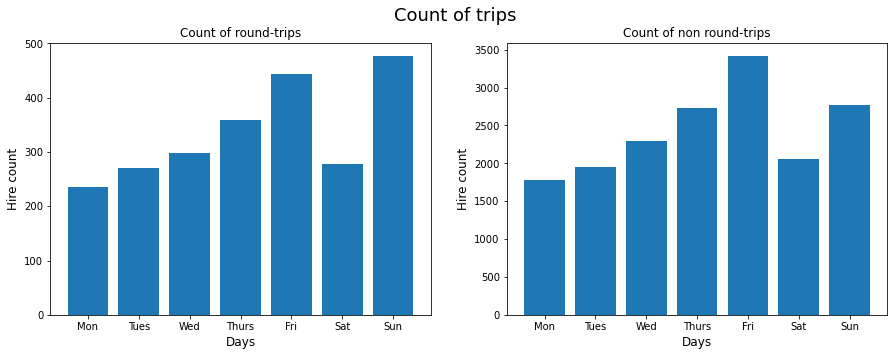

In [37]:
# Generate lists representing the total hire count during the week that's grouped by which day of the week it is. 
#This is done for both round and non-round trips
week_r = list(cycle_circle.groupby(['dow']).count()['started_at'].values)
week_nr = list(cycle_AB.groupby(['dow']).count()['started_at'].values)

# Write list containing days of the week
day_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# plot number of trips for weekdays and weekends
fig1 = plt.figure(figsize=(15,5))
fig1.suptitle('Count of trips', fontsize=18)
ax1 = fig1.add_subplot(121)
ax1.set_title('Count of round-trips')
ax1.set_xlabel('Days',fontsize = 12)
ax1.set_ylabel('Hire count',fontsize = 12)
ax1.bar(day_names, week_r)

ax2 = fig1.add_subplot(122)
ax2.set_title('Count of non round-trips')
ax2.set_xlabel('Days',fontsize = 12)
ax2.set_ylabel('Hire count',fontsize = 12)
ax2.bar(day_names, week_nr)
plt.show()

In [38]:
# we use the hourly_trips tuple defined in the setup. 
# idxmax, gives the index of the highest value in hourly_trips[1] which is the number of trips for each hour
print('The most common time of day for journeys to be undertaken is {}:00-{}:00.'\
      .format(hourly_trips[1].idxmax(),hourly_trips[1].idxmax()+1))

The most common time of day for journeys to be undertaken is 16:00-17:00.


In [39]:
# we use the pre defined split up into weekdays and weekends 
# and use the trips_hour() function to record the number of trips per hour
hourly_weekdays = weekdaydata_funcs.trips_hour()
print('The most common time of day for journeys to be undertaken on weekdays is {}:00-{}:00.'\
      .format(hourly_weekdays[1].nlargest(2).index[0],hourly_weekdays[1].nlargest(2).index[0]+1))
print('The second most common time of day for journeys to be undertaken on weekdays is {}:00-{}:00.\n'\
      .format(hourly_weekdays[1].nlargest(2).index[1],hourly_weekdays[1].nlargest(2).index[1]+1))

hourly_weekends = weekenddata_funcs.trips_hour()
print('The most common time of day for journeys to be undertaken on weekends is {}:00-{}:00.'\
      .format(hourly_weekends[1].idxmax(),hourly_weekends[1].idxmax()+1))
print('The second most common time of day for journeys to be undertaken on weekends is {}:00-{}:00.'\
      .format(hourly_weekends[1].nlargest(2).index[1],hourly_weekends[1].nlargest(2).index[1]+1))

The most common time of day for journeys to be undertaken on weekdays is 16:00-17:00.
The second most common time of day for journeys to be undertaken on weekdays is 17:00-18:00.

The most common time of day for journeys to be undertaken on weekends is 15:00-16:00.
The second most common time of day for journeys to be undertaken on weekends is 14:00-15:00.


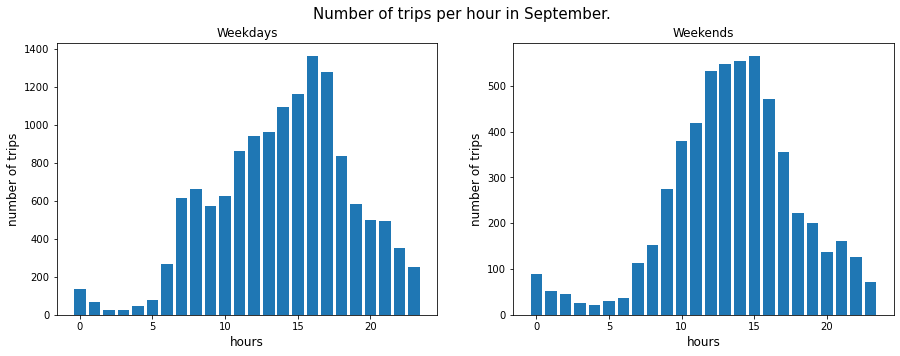

In [40]:
# plot number of trips for weekdays and weekends
h = np.arange(24)
fig1 = plt.figure(1,figsize=(15,5))
fig1.suptitle('Number of trips per hour in September.',fontsize = 15)

ax1 = fig1.add_subplot(121)
ax1.bar(h,hourly_weekdays[1].values)
# set axes labels and title
ax1.title.set_text('Weekdays')
ax1.set_xlabel('hours',fontsize = 12)
ax1.set_ylabel('number of trips',fontsize = 12)

ax2 = fig1.add_subplot(122)
ax2.bar(h,hourly_weekends[1].values)
# set axes labels and title
ax2.title.set_text('Weekends')
ax2.set_xlabel('hours',fontsize = 12)
ax2.set_ylabel('number of trips',fontsize = 12)

plt.show()